#### Exercise 1
<!-- @q -->

1. What kinds of EDA techniques might you use to explore the following types of data:
    - Numeric data?  
    - Categorical data?  
    - The relationship between categorical and numeric data?

*Enter your answer in this cell*

2. Generate some fake data (~1000 rows) with 1 categorical column (with 10 categories) and 2 numeric columns. Use the techniques you mentioned to explore the numeric, categorical, and the relationship between them.

In [15]:
# Your code here

# When I work with numeric data, I would start by looking at summary statistics like the mean, median, standard deviation, and quartiles to understand the overall distribution. I would also use visualizations such as histograms, density plots, and boxplots to get a sense of the shape of the data and to check for any outliers. If there are multiple numeric variables, I might also look at correlations to see how they relate to each other.

# For categorical data, I would begin by checking the frequency or proportion of each category. To visualize this, I would use bar charts since they clearly show differences between categories, although pie charts could be used in some cases. If I had more than one categorical variable, I might create cross-tabulations and even run chi-square tests to see if there are significant associations.

# To explore the relationship between categorical and numeric data, I would compare summary statistics like the mean or median across categories. I would also use boxplots, violin plots, or facet histograms to see how the numeric data is distributed within each category. If I wanted to check whether the differences between groups are meaningful, I might use statistical tests such as ANOVA or Kruskal–Wallis.

In [16]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(42)
df = pd.DataFrame({
    "Category": np.random.choice([f"Cat_{i}" for i in range(1, 11)], size=1000),
    "Value1": np.random.normal(loc=50, scale=10, size=1000),
    "Value2": np.random.exponential(scale=20, size=1000)
})

print(df.head())


  Category     Value1     Value2
0    Cat_7  58.678490   2.053117
1    Cat_4  40.634860  39.608135
2    Cat_8  41.244750  12.329733
3    Cat_5  52.046102  27.668666
4    Cat_7  43.973522   6.866364



Summary statistics for numeric columns:
             Value1       Value2
count  1000.000000  1000.000000
mean     50.104442    20.652961
std      10.242074    20.940318
min      14.317947     0.003768
25%      43.514205     5.858889
50%      50.273596    14.783485
75%      57.302433    28.618544
max      81.419670   163.176684


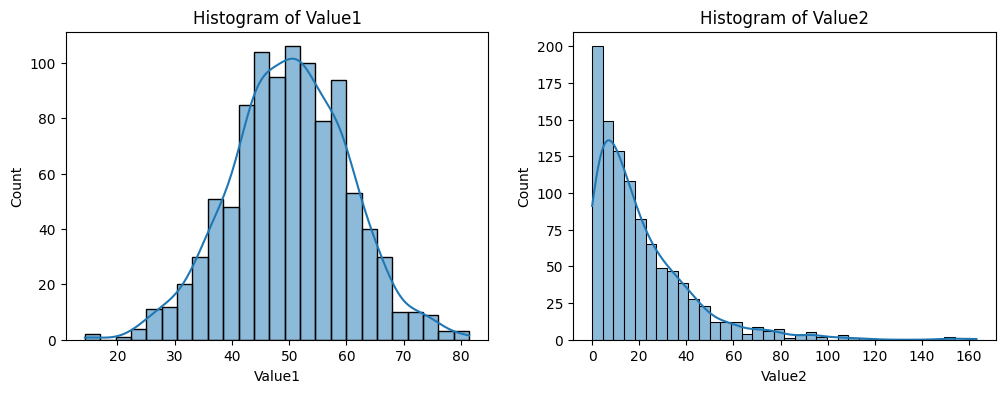

In [17]:
# Your code here
print("\nSummary statistics for numeric columns:\n", df[["Value1", "Value2"]].describe())

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df["Value1"], kde=True)
plt.title("Histogram of Value1")

plt.subplot(1, 2, 2)
sns.histplot(df["Value2"], kde=True)
plt.title("Histogram of Value2")
plt.show()



Category Counts:
 Category
Cat_1     118
Cat_3     110
Cat_10    107
Cat_5     107
Cat_8     100
Cat_6      96
Cat_4      94
Cat_7      94
Cat_9      91
Cat_2      83
Name: count, dtype: int64


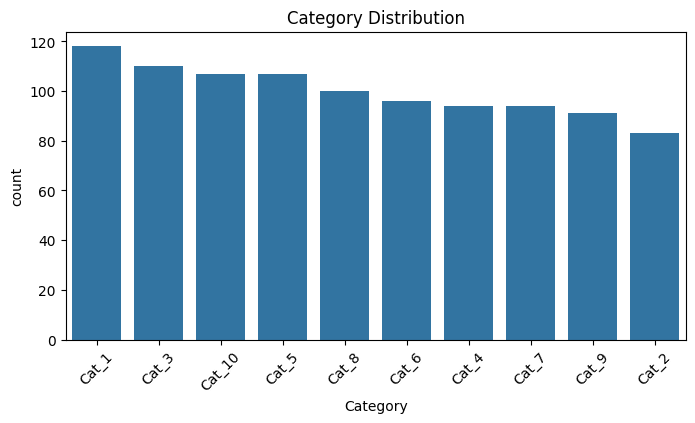

In [18]:
# Your code here
print("\nCategory Counts:\n", df["Category"].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(x="Category", data=df, order=df["Category"].value_counts().index)
plt.title("Category Distribution")
plt.xticks(rotation=45)
plt.show()


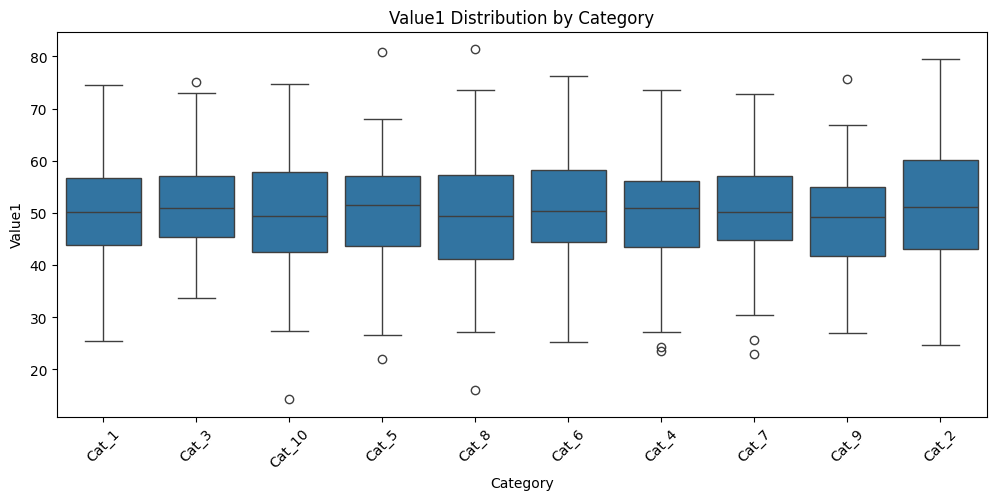

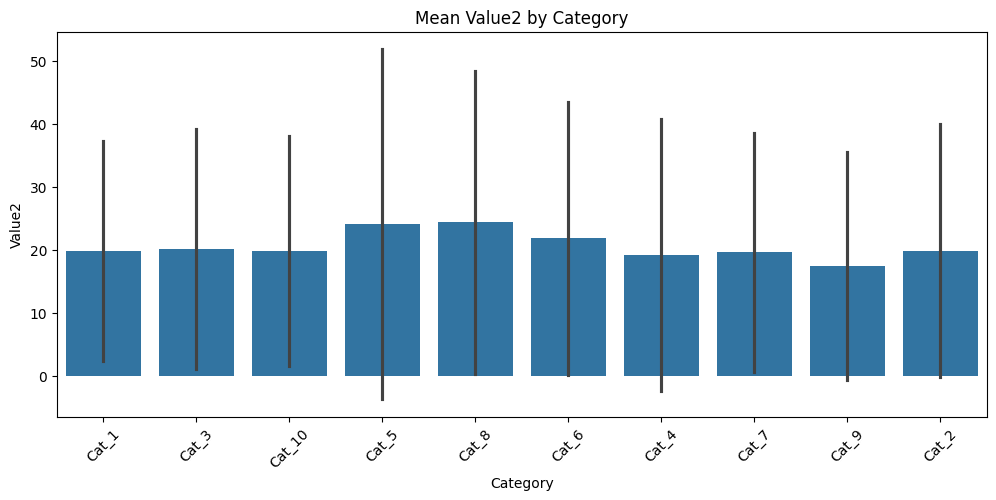

In [19]:
# Your code here
plt.figure(figsize=(12, 5))
sns.boxplot(x="Category", y="Value1", data=df, order=df["Category"].value_counts().index)
plt.title("Value1 Distribution by Category")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 5))
sns.barplot(x="Category", y="Value2", data=df,
            order=df["Category"].value_counts().index,
            errorbar='sd')  
plt.title("Mean Value2 by Category")
plt.xticks(rotation=45)
plt.show()


#### Exercise 2


Generate a data set you can use with a supervised ML model.  The data should meet the following criteria:
   - It should have 1000 rows
   - It should have 6 columns, with one column (your "target" column being a boolean column), one categorical column with 5 categories, and 4 numeric columns.
   - The numeric columns should have dramatically different scales - different means, different std. deviations.
   - Each non-target column should have about 5% nulls.

Make this data a little more interesting by calculating the target column using a noisy function of the other columns.

In [20]:
# Your code here
import pandas as pd
import numpy as np
from numpy.random import choice, normal

np.random.seed(42)
df = pd.DataFrame({
    "CatVar": choice([f"Group_{i}" for i in range(5)], size=1000),
    "Num1": normal(10, 2, 1000),
    "Num2": normal(1000, 200, 1000),
    "Num3": normal(0, 1, 1000),
    "Num4": normal(50, 15, 1000),
})

for col in df.columns:
    df.loc[df.sample(frac=0.05).index, col] = np.nan

df["target"] = ((df["Num1"].fillna(10) + df["Num3"].fillna(0) + np.random.randn(1000)) > 10).astype(int)

print(df.head())
print("\nNull counts per column:\n", df.isnull().sum())
print("\nTarget distribution:\n", df['target'].value_counts())

    CatVar       Num1         Num2      Num3       Num4  target
0  Group_3  10.218790  1059.750582 -0.734174  35.212943       0
1  Group_4  11.451533   849.641790  0.081996  45.737674       1
2      NaN  10.962018   914.728481  0.457280  67.921443       1
3      NaN  10.447768  1229.689142  1.455822  63.419708       1
4      NaN        NaN  1022.654082  0.704507  29.407108       1

Null counts per column:
 CatVar    50
Num1      50
Num2      50
Num3      50
Num4      50
target     0
dtype: int64

Target distribution:
 target
1    531
0    469
Name: count, dtype: int64


In [21]:
# Your code here
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def run_classifier(df, classifier):
    y = df["target"].astype(int)
    X = df.drop(columns=["target"])

    
    numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

    
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ])

    
    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

    
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features)
        ]
    )

    
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])

    
    return cross_val_score(pipeline, X, y, scoring="f1", cv=5)



scores = run_classifier(df, LogisticRegression(random_state=42, max_iter=1000))
print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))


F1 (5-fold): mean=0.871, std=0.016
Fold scores: [0.879 0.841 0.891 0.87  0.874]


#### Exercise 3

Use whatever resources you need to figure out how to build an SKLearn ML pipelines. Use a pipeline to build an ML approach to predicting your target column in the preceding data with logistic regression.  I have set up the problem below so that you will write your code in a function function call that takes an SKLearn model and data frame and returns the results of a cross validation scoring routine.  

I have not taught you how to do this; use the book, google, the notes, chatgpt, or whatever. This is a test of your ability to *find* information, and use this to construct a solution. Your solution should:

- Use a transformer pipeline that processes your numeric and categorical features separately
- Place everything in a pipeline with the classifier that is passed in to the function.
- I've already implemented the call to cross_val_score - to make it work, you'll need to assign your pipeline to the `pipeline` variable.

_Note: You could just feed this question to AI and get an answer, and chances are, it will be right. But if you do, you won't really learn much. So, be thoughtful in your use of AI here - you can use it to build the solution step by step, and it will explain how everything works. It's all in how you use it. So, it's your choice - go for the easy grade, or learn something._

In [22]:
# --- Imports
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def run_classifier(df,classifier):
    # Separate features/target
    y = df["target"].astype(int)  # logistic expects numeric; 0/1 from boolean
    X = df.drop(columns=["target"])

    #You fill in the pipeline definition.  Make sure to:
    # - process categorical features (using an imputer and one hot encoder)
    # - process numeric features (using an imputer and StandardScaler)
    # - define your pipeline using `pipeline = ...`

# TODO: Replace with your code (fill)
    # --- 5-fold CV using F1
    return cross_val_score(pipeline, X, y, scoring="f1", cv=5)


scores = run_classifier(df,LogisticRegression(random_state=42))
print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))

NameError: name 'pipeline' is not defined

Try using a `RandomForestClassifier` in the preceding pipeline. Just call `run_classifier` with a `RandomForestClassifier`, and print out the results as above.

In [ ]:
# Your code here
from sklearn.ensemble import RandomForestClassifier
rf_scores = run_classifier(df, RandomForestClassifier(random_state=42, n_estimators=100))
print(f"F1 (5-fold): mean={rf_scores.mean():.3f}, std={rf_scores.std():.3f}")
print("Fold scores:", np.round(rf_scores, 3))


F1 (5-fold): mean=0.843, std=0.028
Fold scores: [0.868 0.811 0.874 0.854 0.81 ]


Normally, `RandomForestClassifier`s are considered to be more powerful than `LogisticRegression`.  Depending on your data, this may or may not be the case. Reflect on your answers - which one does better here, and why do you think that is?  Once again, you might use AI, but you should probably also try to _understand_ the answer.

In [23]:
#answer
#In my case, Logistic Regression performed better. I think this happened because the patterns in my data were fairly linear, so the simpler Logistic Regression model was able to capture them effectively without overfitting. Even though Random Forests are often more powerful on complex datasets, they didn’t provide an advantage here, possibly because my dataset wasn’t very large or didn’t have complicated nonlinear relationships. This experience helped me see that a more complex model isn’t always better understanding the nature of your data is just as important as the algorithm you choose.

# 